In [40]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature, exposure
from matplotlib.pyplot import bar
from skimage.transform import resize
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from PIL import Image, ImageEnhance
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from imutils import paths
import os

In [4]:
#https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html
#https://cvexplained.wordpress.com/2020/07/22/10-7-local-binary-patterns/
#numPoints=24, radius=8
def LocalBinaryPatterns(image, eps=1e-7,numPoints=16, radius=2):
    # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        #https://scikit-image.org/docs/dev/api/skimage.feature.html#local-binary-pattern
        #'uniform', the result only includes patterns where all black dots are adjacent and all white dots are adjacent. All other combinations are labeled 'non-uniform'.
        #Non-uniform results: If you look at your result more closely, there are actually 243 bins, not 242. The 243th bin lumps together all non-uniform results.
        lbp = feature.local_binary_pattern(image, numPoints,radius, method='nri_uniform')
        pinnum=lbp.ravel().max()
        (hist, edges) = np.histogram(lbp.ravel(),bins=np.arange(0,pinnum))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist,edges

In [5]:
def showHist(hist,edges):
    fig, ax = plt.subplots()
    ax.bar(edges[:-1], hist, width=np.diff(edges), edgecolor="red", align="edge")
    plt.show()

(241,)


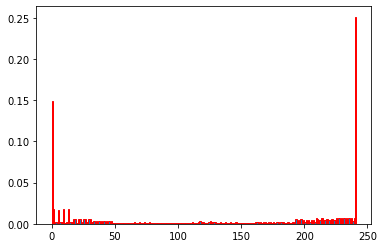

In [26]:
imagePath='F109.JPG'
image = cv2.imread(imagePath)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
hist,edges = LocalBinaryPatterns(gray)
print(hist.shape)
showHist(hist,edges)

In [6]:
# loop over the training images
data = []
labels = []
for imagePath in paths.list_images("training"):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist,edges = LocalBinaryPatterns(gray)
    #print(hist.shape)
    # extract the label from the image path, then update the
    # label and data lists
    labels.append(imagePath.split(os.path.sep)[1][0])
    data.append(hist)
# train a Linear SVM on the data

In [7]:
def preparelabels(labels):
    labels2= np.array(labels)
    msk = (labels2=='F')
    return  msk.astype(int)
    

In [8]:
training_data= np.array(data,"float64") 
training_lablels=preparelabels(labels) 
print(training_lablels)
print(training_data.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
(191, 241)


In [10]:
model = LinearSVC(C=100.0, random_state=42)
model.fit(training_data, training_lablels)

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0)

In [11]:
Tdata = []
Tlabels = []
for imagePath in paths.list_images("testing"):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist,edges = LocalBinaryPatterns(gray)
    # extract the label from the image path, then update the
    # label and data lists
    Tlabels.append(imagePath.split(os.path.sep)[1][0])
    Tdata.append(hist)

In [12]:
testing_data= np.array(Tdata,"float64") 
testing_lablels=preparelabels(Tlabels)  
print(testing_lablels)
print(testing_data.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(67, 241)


In [36]:
model = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model.fit(training_data, training_lablels)

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
model = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'gini', n_jobs=-1)

# Train the model using the training sets
model.fit(training_data, training_lablels)

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [42]:
prediction=[]
for test_i in testing_data:
    prediction_i = model.predict(test_i.reshape(1, -1))
    prediction.append(prediction_i[0])
    

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing thi

In [43]:
prediction=np.array(prediction) 
print(prediction)
acc = sklearn.metrics.accuracy_score(testing_lablels,prediction)
print(acc)

[0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0]
0.6716417910447762


In [44]:
#https://mulloverthings.com/how-do-you-extract-hog-features-in-python/
def HistogramofOrientedGradients(image):
    resized_img = resize(image, (128, 64))
    #print(resized_img.shape)
    fd, hog_image = feature.hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
    
    return fd
    #print(fd[:11].sum())
    #print(fd.shape)
    #pinnum=fd.max()
    #(hist, edges) = np.histogram(fd,bins=np.arange(0,pinnum))
    # Rescale histogram for better display
    #plt.hist(fd,fd.shape[0],[0,1]);
    #plt.show()

    #plt.imshow(hog_image, cmap="gray")

In [45]:
# loop over the training images
hog_data = []
hog_labels = []
for imagePath in paths.list_images("training"):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    fd=HistogramofOrientedGradients(image)
    # extract the label from the image path, then update the
    # label and data lists
    hog_labels.append(imagePath.split(os.path.sep)[1][0])
    hog_data.append(fd)
# train a Linear SVM on the data

In [46]:
hog_training= np.array(hog_data,"float64") 
hog_training_lablels=preparelabels(hog_labels) 
print(hog_training_lablels)
print(hog_training.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
(191, 3780)


In [58]:
model2 = LinearSVC()
model2.fit(hog_training, hog_training_lablels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [48]:
hog_Tdata = []
hog_Tlabels = []
for imagePath in paths.list_images("testing"):
    # load the image, convert it to grayscale, and describe it
    image = cv2.imread(imagePath)
    fd=HistogramofOrientedGradients(image)
    # extract the label from the image path, then update the
    # label and data lists
    hog_Tlabels.append(imagePath.split(os.path.sep)[1][0])
    hog_Tdata.append(fd)

In [50]:
hog_testing= np.array(hog_Tdata,"float64") 
hog_testing_lablels=preparelabels(hog_Tlabels)  

In [63]:
model2 = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'gini', n_jobs=-1)

# Train the model using the training sets
model2.fit(hog_training, hog_training_lablels)

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:489: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_store_unique_indices = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence thi

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\tree\tree.py:163: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [72]:
model2 = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
model2.fit(hog_training, hog_training_lablels)

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
hog_prediction=[]
for test_i in hog_testing:
    prediction_i = model2.predict(test_i.reshape(1, -1))
    hog_prediction.append(prediction_i[0])

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbor

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:441: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  old_joblib = LooseVersion(joblib_version) < LooseVersion('0.12')
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\neighbor

In [74]:
hog_prediction=np.array(hog_prediction) 
print(hog_prediction)
hog_acc = sklearn.metrics.accuracy_score(hog_testing_lablels,hog_prediction)
print(hog_acc)

[0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0
 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
0.6567164179104478


(128, 64, 3)
(3780,)


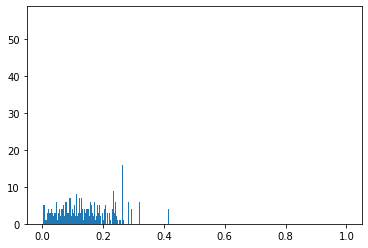

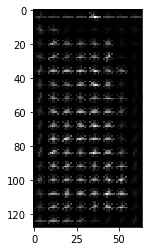

In [17]:
imagePath='HR.JPG'
image = cv2.imread(imagePath)
HistogramofOrientedGradients(image)

In [87]:
N_RHO_BINS = 7
N_ANGLE_BINS = 12
N_BINS = N_RHO_BINS * N_ANGLE_BINS
BIN_SIZE = 360 // N_ANGLE_BINS
R_INNER = 5.0
R_OUTER = 35.0
K_S = np.arange(3, 8)

In [88]:
def preprocess_image(img_file,show_images=True,sharpness_factor = 10, bordersize = 3,):
        im = Image.open(img_file)
        
        enhancer = ImageEnhance.Sharpness(im)
        im_s_1 = enhancer.enhance(sharpness_factor)
        # plt.imshow(im_s_1, cmap='gray')
        # double the size of the image
        (width, height) = (im.width * 2, im.height * 2)
        im_s_1 = im_s_1.resize((width, height))
        
        if show_images: plt.imshow(im_s_1, cmap='gray')
        image = np.array(im_s_1)
        image = cv2.copyMakeBorder(
            image,
            top=bordersize,
            bottom=bordersize,
            left=bordersize,
            right=bordersize,
            borderType=cv2.BORDER_CONSTANT,
            value=[255, 255, 255]
        )
        orig_image = image.copy()
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.GaussianBlur(image,(3,3),0)
        if show_images: plt.imshow(image, cmap='gray')
        (thresh, bw_image) = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        if show_images: plt.imshow(bw_image, cmap='gray')
        return bw_image, orig_image

In [89]:
def get_contour_pixels(bw_image,show_images=True):
        contours, _= cv2.findContours(
            bw_image, cv2.RETR_TREE, 
            cv2.CHAIN_APPROX_NONE
            ) 
        # contours = imutils.grab_contours(contours)
        contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:]
        
        # newaxise to incease the dimantion
        img2 = bw_image.copy()[:,:,np.newaxis]
        img2 = np.concatenate([img2, img2, img2], axis = 2)
        if show_images:
            for cnt in contours : 
                cv2.drawContours(img2, [cnt], 0, (255, 0, 0), 1)  
                
            plt.imshow(img2, cmap='gray')
        return contours

In [90]:
def get_cold_features(img_file, show_images=False ,approx_poly_factor = 0.01):
        bw_image, _ = preprocess_image(img_file,show_images)
        contours = get_contour_pixels(bw_image,show_images)
        
        rho_bins_edges = np.log10(np.linspace(R_INNER, R_OUTER, N_RHO_BINS))
        feature_vectors = np.zeros((len(K_S), N_BINS))
        
        # print([len(cnt) for cnt in contours])
        for j, k in enumerate(K_S):
            hist = np.zeros((N_RHO_BINS, N_ANGLE_BINS))
            for cnt in contours:
                epsilon = approx_poly_factor * cv2.arcLength(cnt,True)
                cnt = cv2.approxPolyDP(cnt,epsilon,True)
                n_pixels = len(cnt)
                
                point_1s = np.array([point[0] for point in cnt])
                x1s, y1s = point_1s[:, 0], point_1s[:, 1]
                point_2s = np.array([cnt[(i + k) % n_pixels][0] for i in range(n_pixels)])
                x2s, y2s = point_2s[:, 0], point_2s[:, 1]
                
                thetas = np.degrees(np.arctan2(y2s - y1s, x2s - x1s) + np.pi)
                rhos = np.sqrt((y2s - y1s) ** 2 + (x2s - x1s) ** 2)
                rhos_log_space = np.log10(rhos)
                
                quantized_rhos = np.zeros(rhos.shape, dtype=int)
                for i in range(N_RHO_BINS):
                    quantized_rhos += (rhos_log_space < rho_bins_edges[i])
                    
                for i, r_bin in enumerate(quantized_rhos):
                    theta_bin = int(thetas[i] // BIN_SIZE) % N_ANGLE_BINS
                    hist[r_bin - 1, theta_bin] += 1
                
            normalised_hist = hist / hist.sum()
            feature_vectors[j] = normalised_hist.flatten()
            
        return feature_vectors.flatten()

In [96]:
Cold_data = []
Cold_labels = []
for imagePath in paths.list_images("training"):
    # load the image, convert it to grayscale, and describe it
    #image = cv2.imread(imagePath)
    feature_vector=get_cold_features(imagePath)
    # extract the label from the image path, then update the
    # label and data lists
    Cold_labels.append(imagePath.split(os.path.sep)[1][0])
    Cold_data.append(feature_vector)
# train a Linear SVM on the data

C:\Users\Raghod\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


In [97]:
Cold_training= np.array(Cold_data,"float64") 
Cold_training_lablels=preparelabels(Cold_labels) 
print(Cold_training_lablels)
print(Cold_training.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]
(191, 420)


In [124]:
model3 = LinearSVC(verbose=True, C=10)
model3.fit(Cold_training, Cold_training_lablels)

[LibLinear]

LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=True)

In [99]:
Cold_Tdata = []
Cold_Tlabels = []
for imagePath in paths.list_images("testing"):
    # load the image, convert it to grayscale, and describe it
    #image = cv2.imread(imagePath)
    feature_vector=get_cold_features(imagePath)
    # extract the label from the image path, then update the
    # label and data lists
    Cold_Tlabels.append(imagePath.split(os.path.sep)[1][0])
    Cold_Tdata.append(feature_vector)

C:\Users\Raghod\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


In [112]:
Cold_testing= np.array(Cold_Tdata,"float64") 
Cold_testing_lablels=preparelabels(Cold_Tlabels)  

In [125]:
Cold_prediction=[]
for test_i in Cold_testing:
    prediction_i = model3.predict(test_i.reshape(1, -1))
    Cold_prediction.append(prediction_i[0])

C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Raghod\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

In [126]:
Cold_prediction=np.array(Cold_prediction) 
print(Cold_prediction)
Cold_acc = sklearn.metrics.accuracy_score(Cold_testing_lablels,Cold_prediction)
print(Cold_acc)

[1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1
 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0]
0.6865671641791045


In [105]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV
# from sklearn.svm import SVC

# cs = MinMaxScaler()
# x_ = cs.fit_transform(Cold_training)
# x_ = np.nan_to_num(x_)
# clf = SVC(kernel='rbf', verbose=True, C=10)
#     # scores = cross_val_score(clf, x_, y, cv=10)
#     # print(scores)
# y_pred_cold = cross_val_predict(clf, x_, Cold_training_lablels, cv=10)

In [104]:
print(y_pred_cold)

[1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0
 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 0 0]


C:\Users\Raghod\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10


(420,)


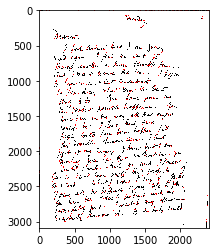

In [251]:
imagePath='HR.JPG'
features=get_cold_features(imagePath)
print(features.shape)

In [119]:
import pickle
# save the model to disk
filename = 'LBP_model.sav'
pickle.dump(model, open(filename, 'wb'))

filename = 'HoG_model.sav'
pickle.dump(model2, open(filename, 'wb'))

filename = 'COLD_model.sav'
pickle.dump(model3, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)